In [44]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('data.csv') 
print(df.shape)
df.describe()

(135, 10)


,Blast NO,B,S,ST,MC,PF,HD,BS,D,PPV
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.00000,135.000000,135.000000,135.000000
mean,68.000000,2.954519,3.623333,3.685185,915.002222,0.664889,12.77037,0.834000,576.758593,4.530437
std,39.115214,0.553385,1.090269,1.275107,931.259906,0.209366,4.97691,0.072813,410.371630,24.622494
min,1.000000,2.500000,3.000000,2.500000,21.016000,0.210000,4.75000,0.620000,23.000000,0.030000
25%,34.500000,2.660000,3.050000,3.000000,76.000000,0.410000,11.00000,0.830000,216.720000,0.445000
50%,68.000000,2.660000,3.050000,3.500000,567.500000,0.790000,12.50000,0.870000,460.000000,1.020000
75%,101.500000,3.670000,4.200000,3.500000,1693.500000,0.790000,12.50000,0.870000,1020.000000,2.490000
max,135.000000,4.000000,6.500000,7.000000,3000.000000,0.830000,25.00000,0.870000,1500.000000,250.000000


In [46]:
X = df.drop(['PPV','Blast NO','B','S'],axis=1)
Y = df['PPV']
predictors = list(set(list(df.columns))-set(Y))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()
Y

0      0.013908
1      0.005272
2      0.011048
3      0.005272
4      0.017520
         ...   
130    0.003800
131    0.004600
132    0.003400
133    0.001400
134    0.001600
Name: PPV, Length: 135, dtype: float64

In [47]:
X = df[predictors].values
y = Y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(94, 10)
(41, 10)


In [48]:
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [49]:
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))

0.05504858254753735
0.1263364177777202
0.1468391176908765
0.08419424502493966


In [50]:
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train) 

y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test)

In [51]:
print(np.sqrt(mean_squared_error(y_train,tr1))) 
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1))) 
print(r2_score(y_test, y1)) 

0.004807689603317869
0.99333615644154
0.06629465503989976
0.8133289948531578


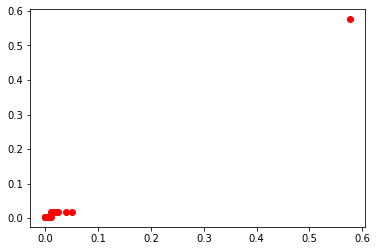

In [52]:
plt.scatter(y_train,tr1,color='red')

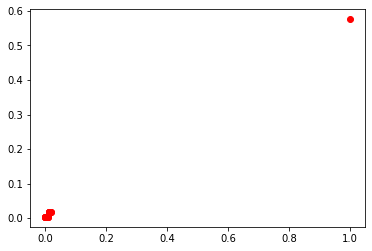

In [53]:
plt.scatter(y_test,y1,color='red')

In [54]:
print(np.sqrt(mean_squared_error(y_train,tr2))) 
print(r2_score(y_train, tr2))

# Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print(np.sqrt(mean_squared_error(y_test,y2))) 
print(r2_score(y_test, y2)) 

0.00041369547977708184
0.9999506583688175
0.06634118467488048
0.8130668686888461


In [55]:
testing = pd.read_csv('test.csv')

In [56]:
pred = dtree1.predict(testing)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: ignored

In [ ]:
pred